## Лабораторна робота 1.2

Зчитати архів Customer Shopping Trends Dataset за посиланням
Далі працюємо з файлом shopping_trends.csv
Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, дублікатів, 
тип стовпців. Перейменуйте назви стовпців: Змініть прописні букви на строчні 
(маленькі) та пробіл на підкреслення.
Далі виконайте наступні завдання. Побудуйте графіки з використанням 
бібліотеки seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Завдання 1

In [2]:
#Завантажемо датасет
db = pd.read_csv("shopping_trends.csv", encoding='latin-1')

print(db.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [3]:
#Визначимо кількість рядків і стовпчиків за допомогою атрибуту shape 
num_rows, num_columns = db.shape

print(f"Кількість рядків: {num_rows}, Кількість стобчиків: {num_columns}")

Кількість рядків: 3900, Кількість стобчиків: 19


In [4]:
#Визначимо тип даних
print("Тип даних: \n", db.dtypes)

Тип даних: 
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [5]:
#Визначимо кількість пропусків
missing_sum = db.isnull().sum()

print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Сума пропусків в кожній колонці: 
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [6]:
#Перевіряємо кількість дублікатів у датасеті
print("Кількість дублікатів:", db.duplicated().sum())

Кількість дублікатів: 0


In [7]:
#Змінюємо прописні букви на строчні (маленькі) та пробіл на підкреслення
db.columns = db.columns.str.lower().str.replace(' ', '_')

print(db.head())

   customer_id  age gender item_purchased  category  purchase_amount_(usd)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  payment_method  shipping_type discount_applied promo_c

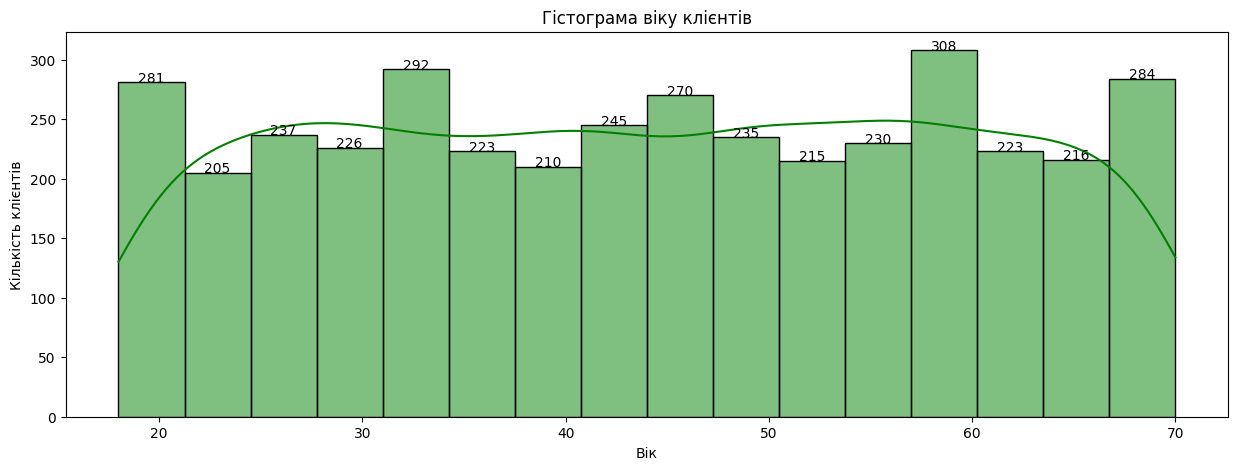

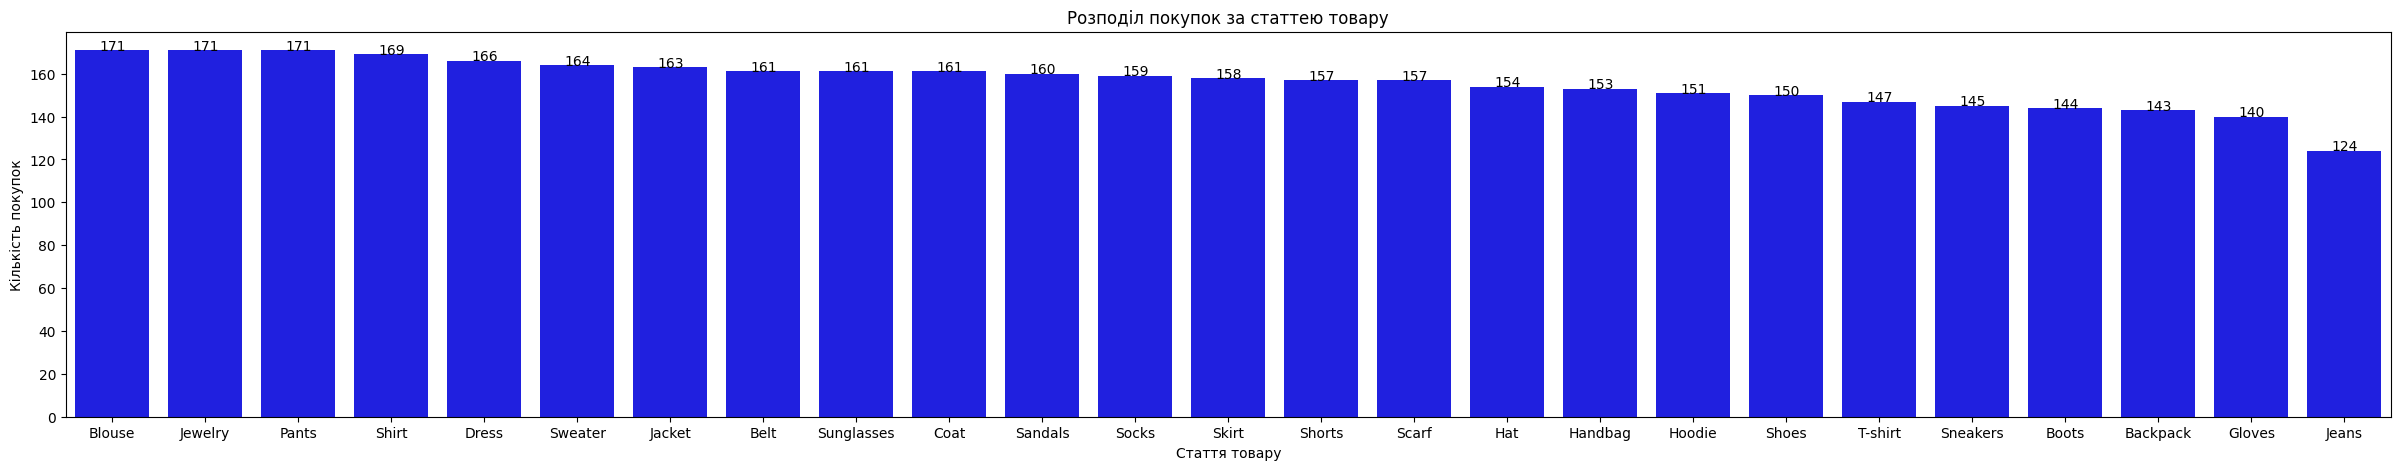

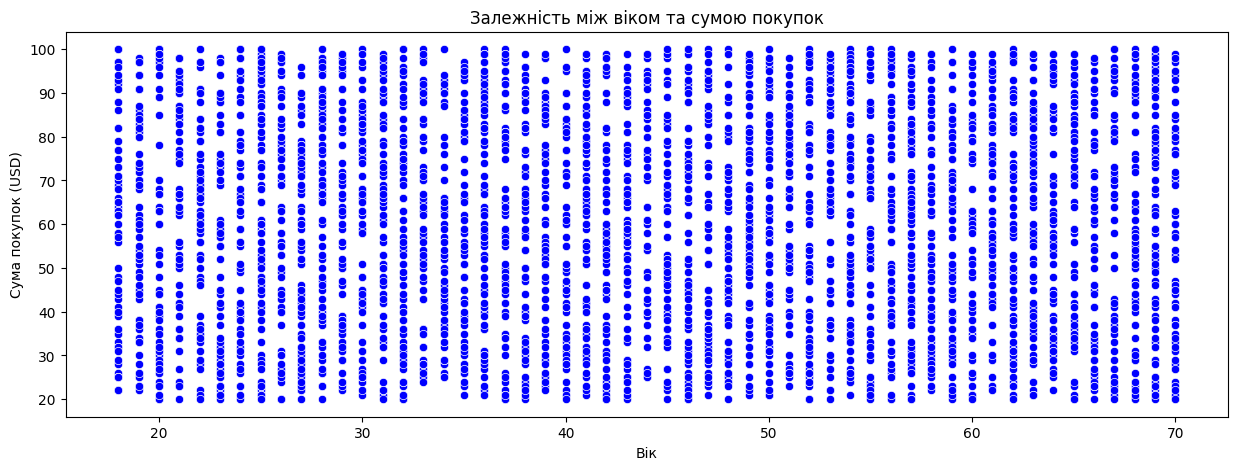

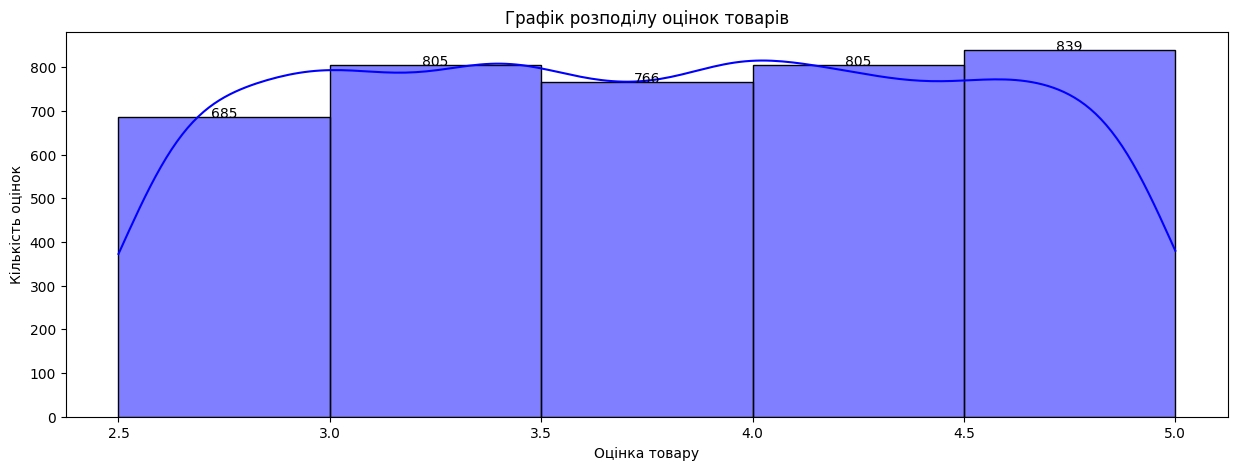

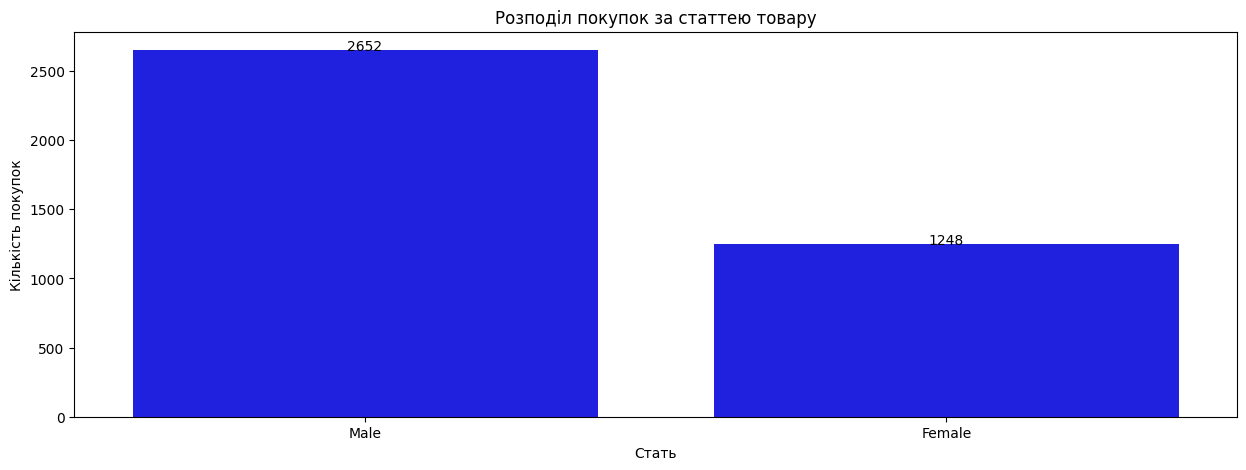

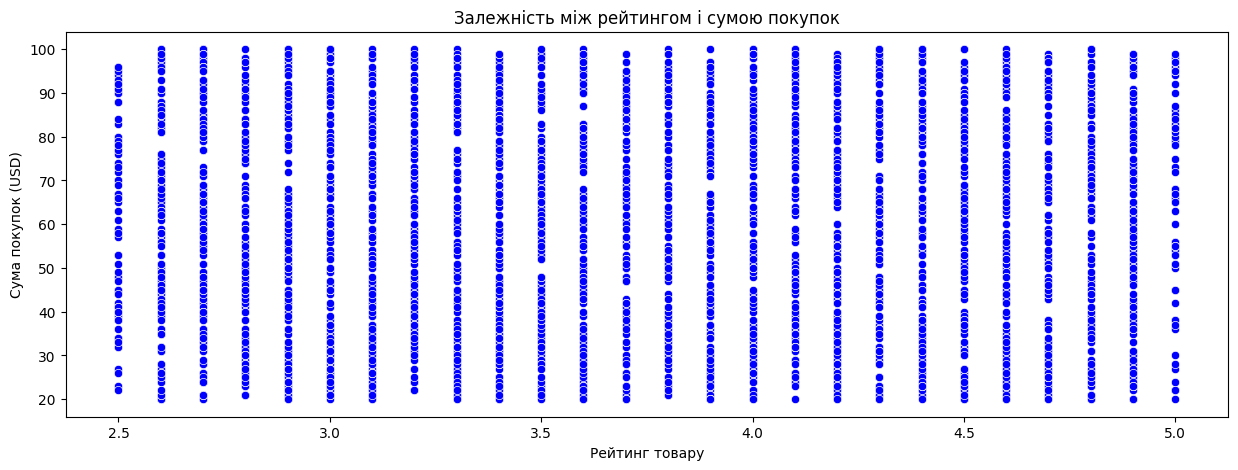

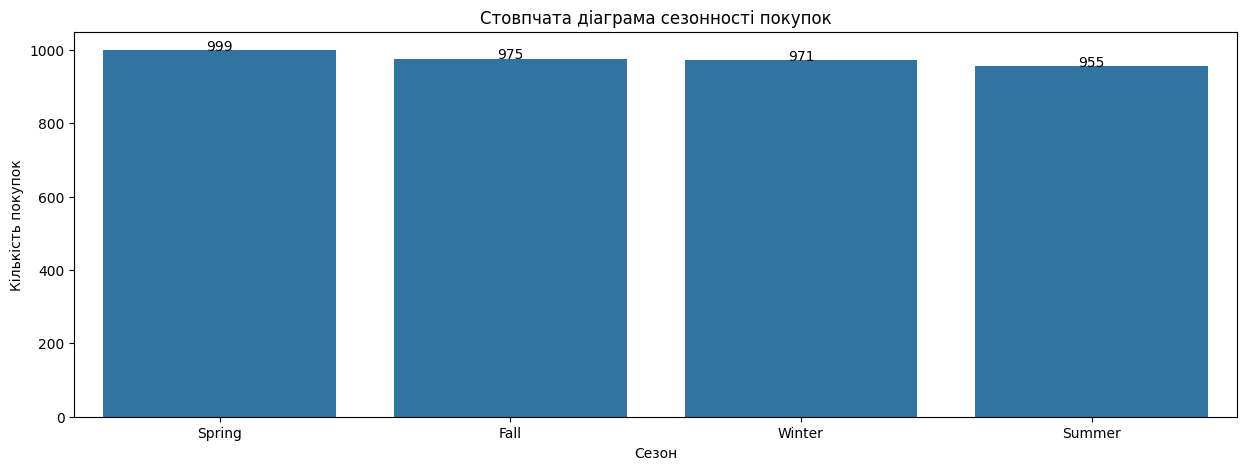

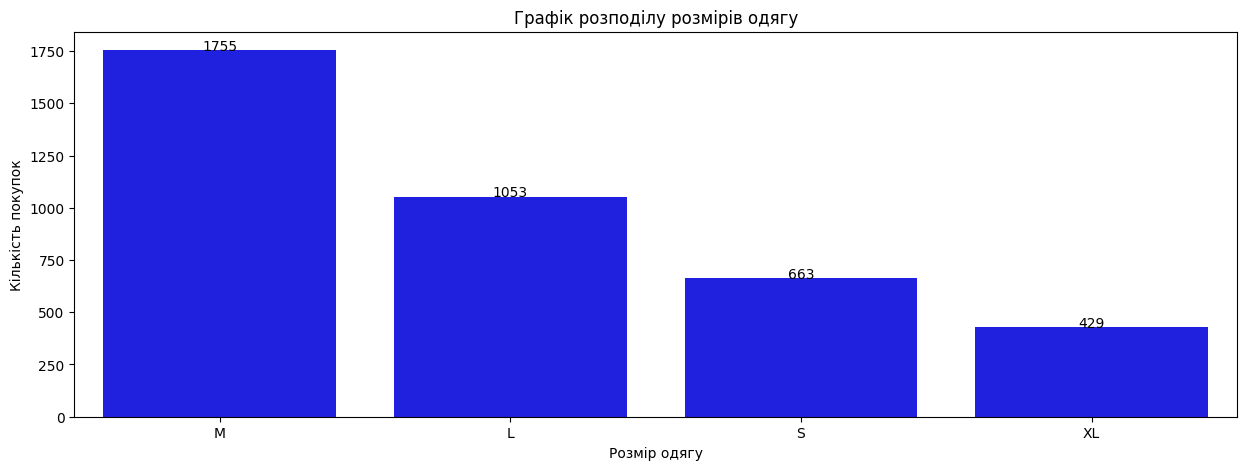

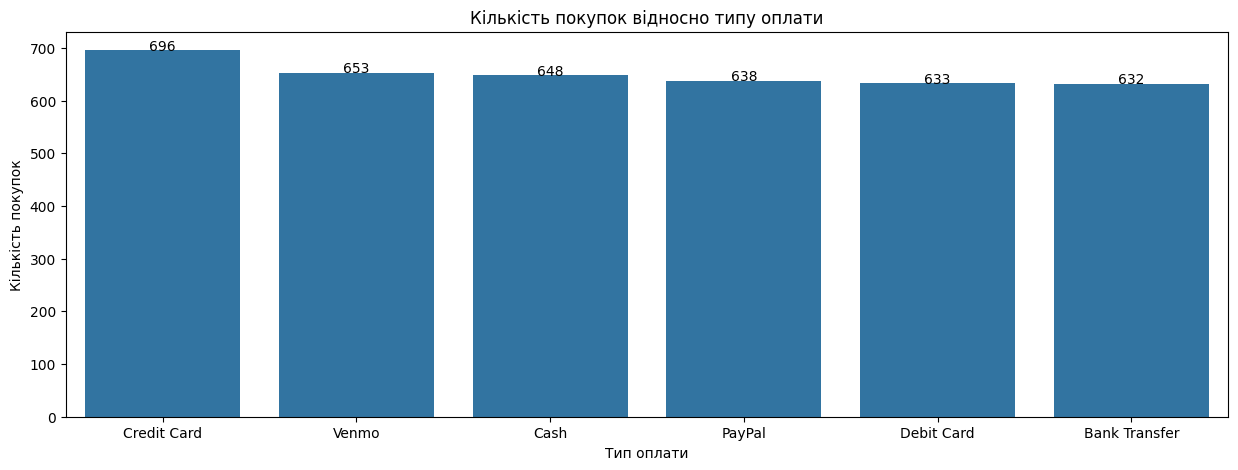

Text(0, 0.5, 'Сума покупок (USD)')

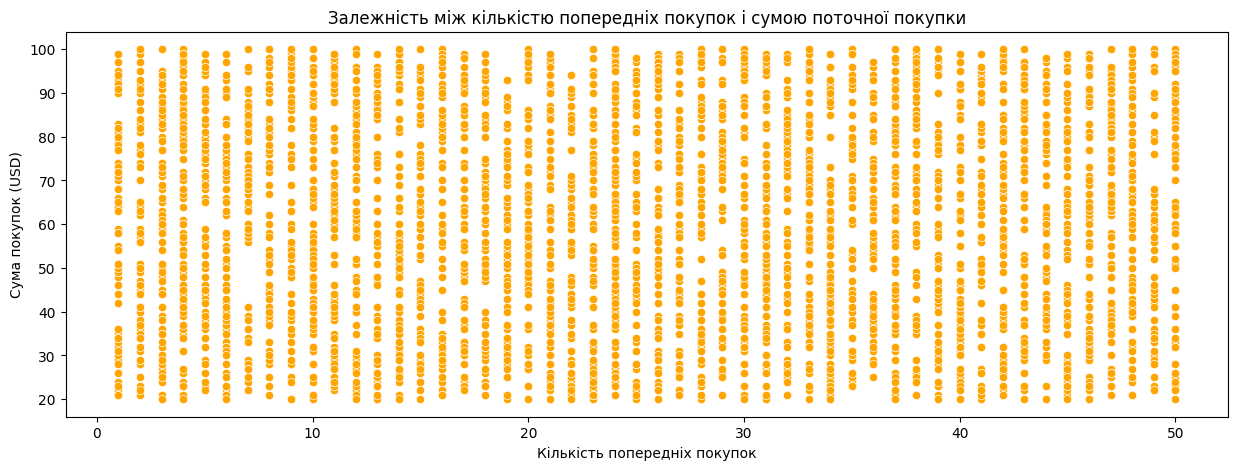

In [8]:
#1.Гістограма віку (age): Побудуйте гістограму віку клієнтів, використовуючи Seaborn
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=db, x='age', bins="auto", kde=True, color='green')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Гістограма віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість клієнтів')
plt.show()

#2.Порівняння розподілу покупок за статтею (item_purchased): Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які товари покупають клієнти найчастіше.
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=db, x='item_purchased', order=db['item_purchased'].value_counts().index, color='blue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Розподіл покупок за статтею товару')
plt.xlabel('Стаття товару')
plt.ylabel('Кількість покупок')
plt.show()


#3. Залежність між віком та сумою покупок (purchase_amount): Використовуйте scatter plot, щоб візуалізувати залежність між віком та сумою покупок.
plt.figure(figsize=(15, 5))
sns.scatterplot(data=db, x='age', y='purchase_amount_(usd)', color='blue')

plt.title('Залежність між віком та сумою покупок')
plt.xlabel('Вік')
plt.ylabel('Сума покупок (USD)')
plt.show()

#4.Графік розподілу оцінок товарів (review_rating): Побудуйте графік розподілу оцінок товарів для оцінки якості.
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=db, x='review_rating', bins=5, kde=True, color='blue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Графік розподілу оцінок товарів')
plt.xlabel('Оцінка товару')
plt.ylabel('Кількість оцінок')
plt.show()

#5. Категоріальна діаграма для статі (gender): Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статтею.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=db, x='gender', color='blue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Розподіл покупок за статтею товару')
plt.xlabel('Стать')
plt.ylabel('Кількість покупок')
plt.show()

#6. Залежність між рейтингом і сумою покупок (review_rating і  purchase_amount): Вивчіть, чи існує зв'язок між рейтингом товару і сумою покупок за допомогою scatter plot.
plt.figure(figsize=(15, 5))
sns.scatterplot(data=db, x='review_rating', y='purchase_amount_(usd)', color='blue')
    
plt.title('Залежність між рейтингом і сумою покупок')
plt.xlabel('Рейтинг товару')
plt.ylabel('Сума покупок (USD)')
plt.show()

#7. Сезонність покупок (season): Побудуйте стовпчату діаграму, яка відображає, в який сезон клієнти роблять найбільше покупок.
plt.figure(figsize=(15, 5))
ax = sns.countplot(db,
                   x = 'season',
                   order = db['season'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Стовпчата діаграма сезонності покупок')
plt.xlabel('Сезон')
plt.ylabel('Кількість покупок')
plt.show()

#8. Графік розподілу розмірів одягу (size): Створіть графік розподілу розмірів одягу, щоб визначити популярність  різних розмірів.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=db, x='size', order=db['size'].value_counts().index, color='blue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Графік розподілу розмірів одягу')
plt.xlabel('Розмір одягу')
plt.ylabel('Кількість покупок')
plt.show()

#9. Кількість покупок відносно типу оплати (payment_method): Порівняйте, скільки покупок робиться за різними методами оплати за допомогою стовпчатої діаграми.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=db, x='payment_method', order=db['payment_method'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Кількість покупок відносно типу оплати')
plt.xlabel('Тип оплати')
plt.ylabel('Кількість покупок')
plt.show()

#10. Залежність між кількістю попередніх покупок (previous_purchases) і сумою поточної покупки (purchase_amount): Створіть scatter plot для визначення, чи існує зв'язок між кількістю попередніх покупок та сумою поточної покупки.
plt.figure(figsize=(15, 5))
sns.scatterplot(data=db, x='previous_purchases', y='purchase_amount_(usd)', color='orange')
    
plt.title('Залежність між кількістю попередніх покупок і сумою поточної покупки')
plt.xlabel('Кількість попередніх покупок')
plt.ylabel('Сума покупок (USD)')

### Завдання 2

Побудуйте графік поверхні (3D surface plot) для візуалізації залежності 
між трьома числовими змінними з використанням бібліотеки Seaborn.
Налаштуйте відображення графіка, включаючи назву графіку, підписи 
осей і інші необхідні параметри для кращого розуміння візуалізації.
Додайте кольорову легенду

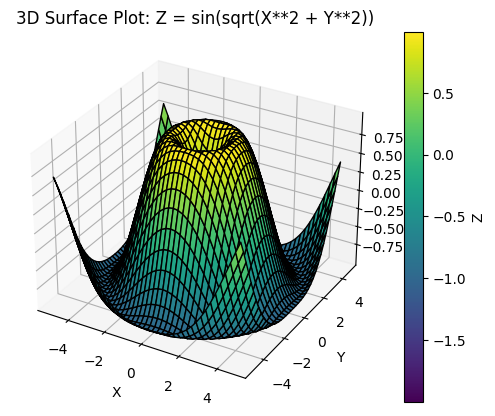

In [9]:
#plot_surface(X, Y, Z)
from matplotlib import cm

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.viridis, edgecolor="k")
fig.colorbar(surface, ax=ax, label='Z')

ax.set_title('3D Surface Plot: Z = sin(sqrt(X**2 + Y**2))')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Завдання 3

Побудуйте графік теплової поверхні для візуалізації залежності між 
двома або більше числовими змінними на основі матриці даних, 
використовуючи бібліотеку Seaborn.
Опис завдання:
Згенеруйте дані, які будуть представлені у вигляді матриці. Ця матриця 
може містить значення залежності між двома або більше числовими 
змінними.
Використовуючи бібліотеку Seaborn, побудуйте графік теплової поверхні 
(heatmap), де кольори відображають значення відповідних елементів 
матриці.
Налаштуйте відображення графіку, включаючи назву графіку, підписи 
осей і інші необхідні параметри для кращого розуміння візуалізації

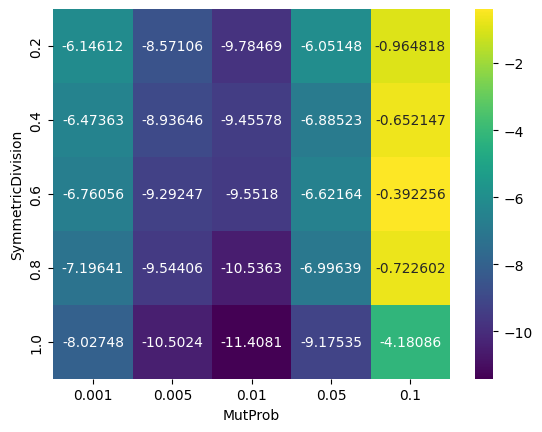

In [10]:
df = pd.DataFrame({'MutProb': [0.1,
  0.05, 0.01, 0.005, 0.001, 0.1, 0.05, 0.01, 0.005, 0.001, 0.1, 0.05, 0.01, 0.005, 0.001, 0.1, 0.05, 0.01, 0.005, 0.001, 0.1, 0.05, 0.01, 0.005, 0.001], 'SymmetricDivision': [1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2], 'test': ['sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule', 'sackin_yule'], 'value': [-4.1808639999999997, -9.1753490000000006, -11.408113999999999, -10.50245, -8.0274750000000008, -0.72260200000000008, -6.9963940000000004, -10.536339999999999, -9.5440649999999998, -7.1964070000000007, -0.39225599999999999, -6.6216390000000001, -9.5518009999999993, -9.2924690000000005, -6.7605589999999998, -0.65214700000000003, -6.8852289999999989, -9.4557760000000002, -8.9364629999999998, -6.4736289999999999, -0.96481800000000006, -6.051482, -9.7846860000000007, -8.5710630000000005, -6.1461209999999999]})

result = df.pivot(index='SymmetricDivision', columns='MutProb', values='value')

sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

plt.show()

#### Висновок: 
На лабораторній роботі, я навчилася створювати гістаграми різних типів за допомогою бібліотеки Seaborn, 3Д графіки та графіки теплової поверхні 
(heatmap)